# Tensorflow MNIST beginners tutorial from scratch
### 02.06.16. M.Evans

In [1]:
# Check tensorflow is installed
import tensorflow as tf

In [2]:
# Find out where it is
! python -c 'import os; import inspect; import tensorflow; print(os.path.dirname(inspect.getfile(tensorflow)))'

/home/mathew/miniconda/envs/tensorflow/lib/python3.4/site-packages/tensorflow


In [3]:
# Check the demo works 
! python -m tensorflow.models.image.mnist.convolutional

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Initialized!
Step 0 (epoch 0.00), 4.7 ms
Minibatch loss: 12.054, learning rate: 0.010000
Minibatch error: 90.6%
Validation error: 84.6%
Step 100 (epoch 0.12), 204.4 ms
Minibatch loss: 3.289, learning rate: 0.010000
Minibatch error: 6.2%
Validation error: 7.0%
Step 200 (epoch 0.23), 201.0 ms
Minibatch loss: 3.427, learning rate: 0.010000
Minibatch error: 10.9%
Validation error: 3.6%
Step 300 (epoch 0.35), 204.0 ms
Minibatch loss: 3.175, learning rate: 0.010000
Minibatch error: 9.4%
Validation error: 3.2%
Step 400 (epoch 0.47), 202.9 ms
Minibatch loss: 3.228, learning 

In [5]:
! pip install matplotlib

    100% |████████████████████████████████| 54.0MB 18kB/s 
    100% |████████████████████████████████| 204kB 2.5MB/s 
    100% |████████████████████████████████| 481kB 1.8MB/s 
    100% |████████████████████████████████| 40kB 6.4MB/s 
  Running setup.py bdist_wheel for matplotlib ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done
  Stored in directory: /home/mathew/.cache/pip/wheels/d8/38/3c/a388e11fd09f9b23f5e4cd74594197394d9fd65f91f64c4aa7
Successfully built matplotlib


## Hacking starts here

In [20]:
# Tensorflow example from first page of docs
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython import display

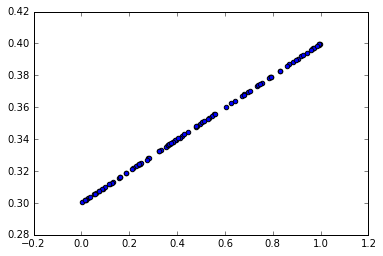

In [7]:
# Create 100 phony x, y data points in NumPy, y = x * 0.1 + 0.3
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3

# Plot the data
plt.scatter(x_data,y_data)

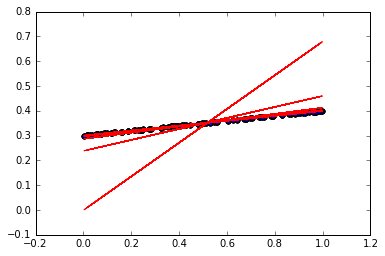

200 [ 0.1000001] [ 0.29999995]


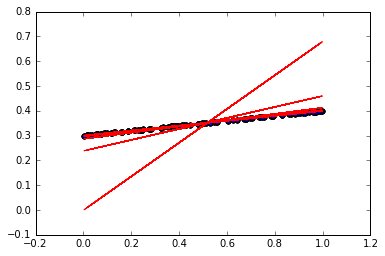

In [24]:
# Try to find values for W and b that compute y_data = W * x_data + b
# (We know that W should be 0.1 and b 0.3, but Tensorflow will
# figure that out for us.)

# Variables to be computed (changed) must be initialised within tensorflow
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

# Then specify what you will do with some of your variables in what tf calls a 'data flow graph' e.g.

# Minimize the mean squared errors.
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

# Before starting, initialize the variables.  We will 'run' this first.
init = tf.initialize_all_variables()

# Launch the graph by starting a tf session, then running 'init'
sess = tf.Session()
sess.run(init)

# Fit the line with tensorflow.
for step in range(201): #no xrange in python 3
    sess.run(train)
    new_y = sess.run(W) * x_data + sess.run(b)
    
    if step % 20 == 0:
        # Plot the data and the result
        plt.scatter(x_data,y_data)
        plt.plot(x_data,new_y,'r')
        display.clear_output(wait=True)
        display.display(plt.gcf())
        print(step, sess.run(W), sess.run(b))
# Learns best fit is W: [0.1], b: [0.3]

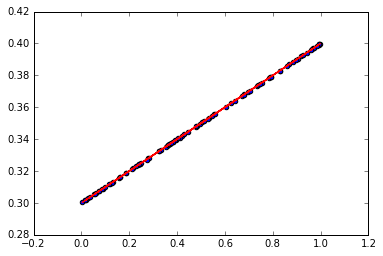

In [25]:
# Get result from tf

new_y = sess.run(W) * x_data + sess.run(b)

# Plot the data and the result
plt.scatter(x_data,y_data)
plt.plot(x_data,new_y,'r')

## Now run the MNIST code

In [26]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [32]:
mnist.train.images.shape

(55000, 784)

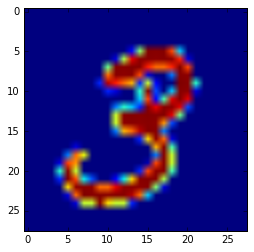

In [42]:
# Imageplot of one of the images
plt.imshow(mnist.train.images[1,:].reshape((28,28)))

In [39]:
im = mnist.train.images[0,:].reshape((28,28))
im.shape

(28, 28)

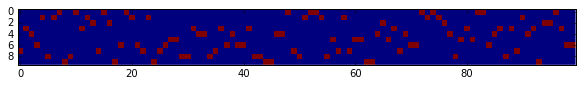

In [51]:
# Image of some labels
fig, ax = plt.subplots(figsize = (20,1))
plt.imshow(mnist.train.labels[0:100,:].T,interpolation = 'none')

In [52]:
# Placeholder array. None means it can be any number of 784 parameter inputs
x = tf.placeholder(tf.float32,[None,784])

In [53]:
# W and b are model variables to be fit by the model
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [54]:
# This is the softmax nn model
y = tf.nn.softmax(tf.matmul(x,W) + b)

In [55]:
# Placeholder for correct answers (test labels)
y_ = tf.placeholder(tf.float32,[None,10])

In [57]:
# Cross entropy loss to assess model performance
# i.e. batch mean of negative sum of log(prediction) * labels
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [58]:
# Implement cross entropy loss with gradient descent on every training step
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [60]:
# initialise variables in tf
init = tf.initialize_all_variables()

In [62]:
# Start tf session
sess = tf.Session()
sess.run(init)

In [64]:
# Run a training loop
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step,feed_dict={x: batch_xs, y_: batch_ys})

In [65]:
# Evaluate model performance
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))

In [68]:
# Convert boolean correct_prediction array into numbers, then compute an average accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [70]:
# Print output of calculation, which involves a sess.run()
print(sess.run(accuracy,feed_dict={x: mnist.test.images,y_:mnist.test.labels}))

0.916
